# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html

ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 2.2.0, 2.2.0+cpu, 2.2.0+cu118, 2.2.0+cu121, 2.2.1, 2.2.1+cpu, 2.2.1+cu118, 2.2.1+cu121, 2.2.2, 2.2.2+cpu, 2.2.2+cu118, 2.2.2+cu121, 2.3.0, 2.3.0+cpu, 2.3.0+cu118, 2.3.0+cu121, 2.3.1, 2.3.1+cpu, 2.3.1+cu118, 2.3.1+cu121, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [4]:
!pip install transformers requests beautifulsoup4 pandas numpy pybind11>=2.12

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

# 2. Instantiate Model

In [6]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# 3. Encode and Calculate Sentiment

In [7]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [8]:
result = model(tokens)

In [9]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [10]:
int(torch.argmax(result.logits))+1

4

# 4. Collect Reviews

In [11]:
import time

def get_flipkart_reviews(url):
    """
    Scrape reviews from a Flipkart product page
    """
    # Headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        # Make request with headers and timeout
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        
        # Create BeautifulSoup object
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find review containers
        # The class name "t-ZTKy" is commonly used for review text on Flipkart
        review_elements = soup.find_all('div', {'class': 'ZmyHeo'})
        
        # Extract review texts
        reviews = []
        for review in review_elements:
            review_text = review.get_text(strip=True)
            if review_text:
                reviews.append(review_text)
                
        return reviews
        
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
        return []
    except Exception as e:
        print(f"Error parsing reviews: {e}")
        return []

# Example usage
url = 'https://www.flipkart.com/zauky-woven-printed-men-muffler/p/itm15bee2b6a3093'
reviews = get_flipkart_reviews(url)

# Print reviews
for i, review in enumerate(reviews, 1):
    print(f"Review #{i}: {review}")
    print("-" * 50)

Review #1: Good product and makhmali topas .real it is very nice product.you can purchase it for winter.READ MORE
--------------------------------------------------
Review #2: Super hit muflarREAD MORE
--------------------------------------------------
Review #3: Good product but quality mediumREAD MORE
--------------------------------------------------
Review #4: I love this productREAD MORE
--------------------------------------------------
Review #5: Smooth and warm enough for Indian winter season.READ MORE
--------------------------------------------------
Review #6: SupperREAD MORE
--------------------------------------------------
Review #7: GoodREAD MORE
--------------------------------------------------
Review #8: Jast okREAD MORE
--------------------------------------------------
Review #9: Not so good qualityREAD MORE
--------------------------------------------------
Review #10: Thnx you flipkartREAD MORE
--------------------------------------------------


In [12]:
reviews

['Good product and makhmali topas .real it is very nice product.you can purchase it for winter.READ MORE',
 'Super hit muflarREAD MORE',
 'Good product but quality mediumREAD MORE',
 'I love this productREAD MORE',
 'Smooth and warm enough for Indian winter season.READ MORE',
 'SupperREAD MORE',
 'GoodREAD MORE',
 'Jast okREAD MORE',
 'Not so good qualityREAD MORE',
 'Thnx you flipkartREAD MORE']

# 5. Load Reviews into DataFrame and Score

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [15]:
df['review'].iloc[0]

'Good product and makhmali topas .real it is very nice product.you can purchase it for winter.READ MORE'

In [16]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [17]:
sentiment_score(df['review'].iloc[1])

5

In [18]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [19]:
df

,review,sentiment
0,Good product and makhmali topas .real it is ve...,5
1,Super hit muflarREAD MORE,5
2,Good product but quality mediumREAD MORE,3
3,I love this productREAD MORE,5
4,Smooth and warm enough for Indian winter seaso...,5
5,SupperREAD MORE,5
6,GoodREAD MORE,5
7,Jast okREAD MORE,3
8,Not so good qualityREAD MORE,2
9,Thnx you flipkartREAD MORE,5


In [23]:
!pip install matplotlib seaborn

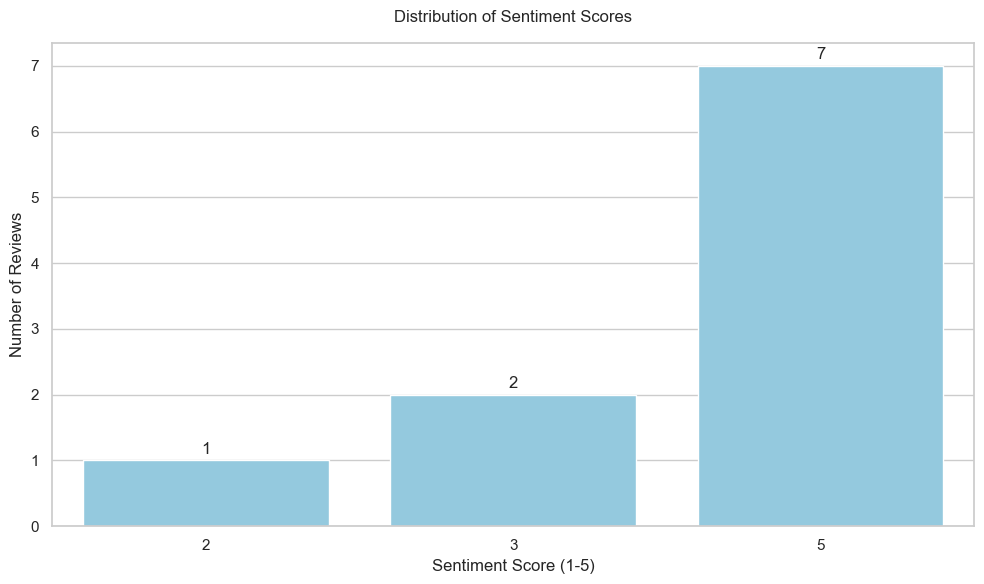

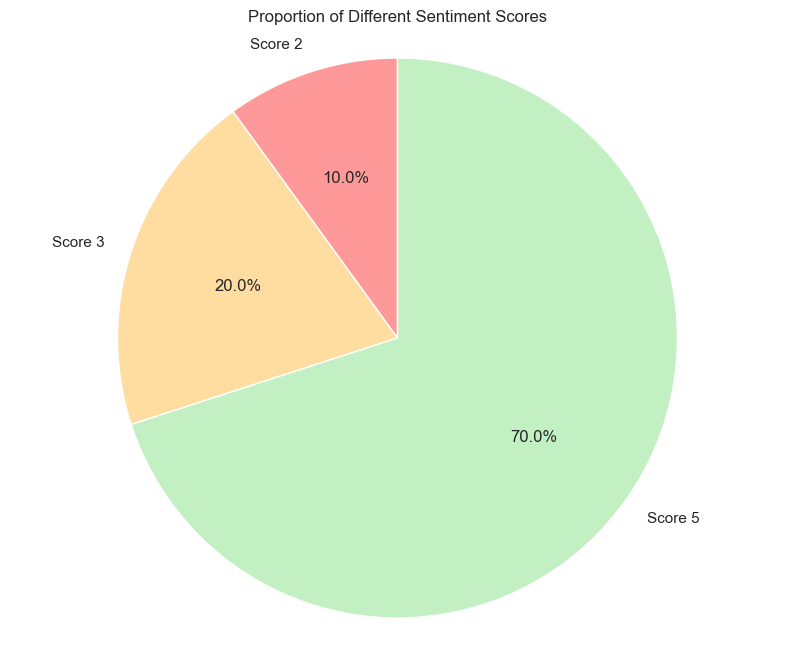

C:\Users\reube\AppData\Local\Temp\ipykernel_23400\57119894.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='RdYlGn')


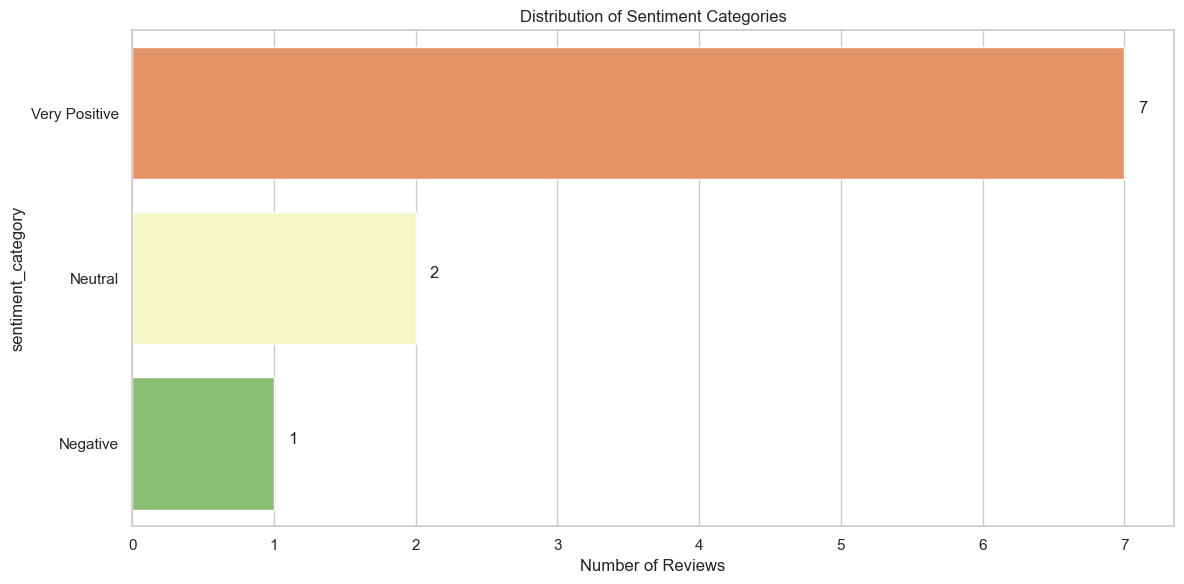

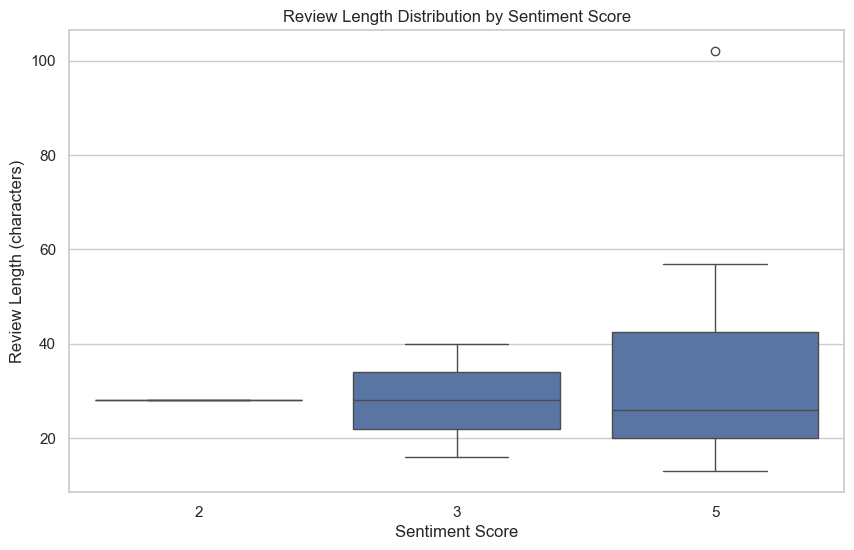

C:\Users\reube\AppData\Local\Temp\ipykernel_23400\57119894.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sentiment_by_length = df.groupby('length_bucket')['sentiment'].mean()


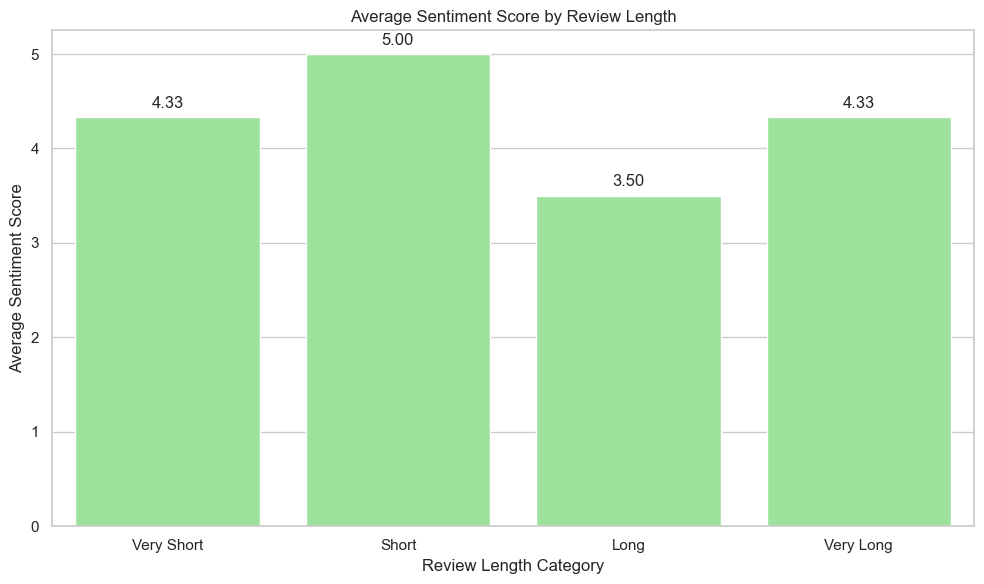

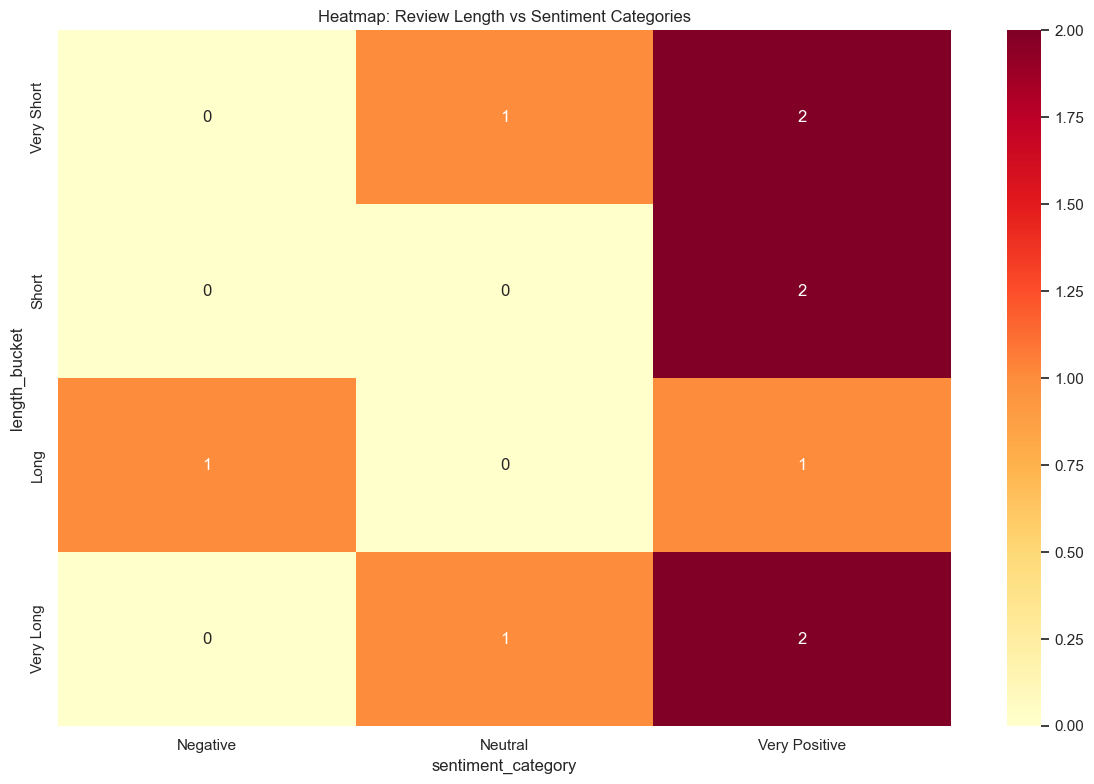

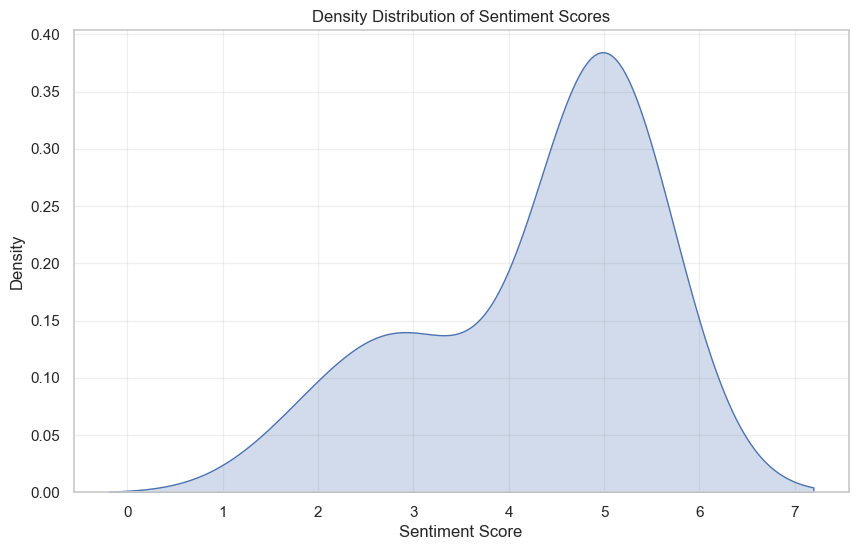

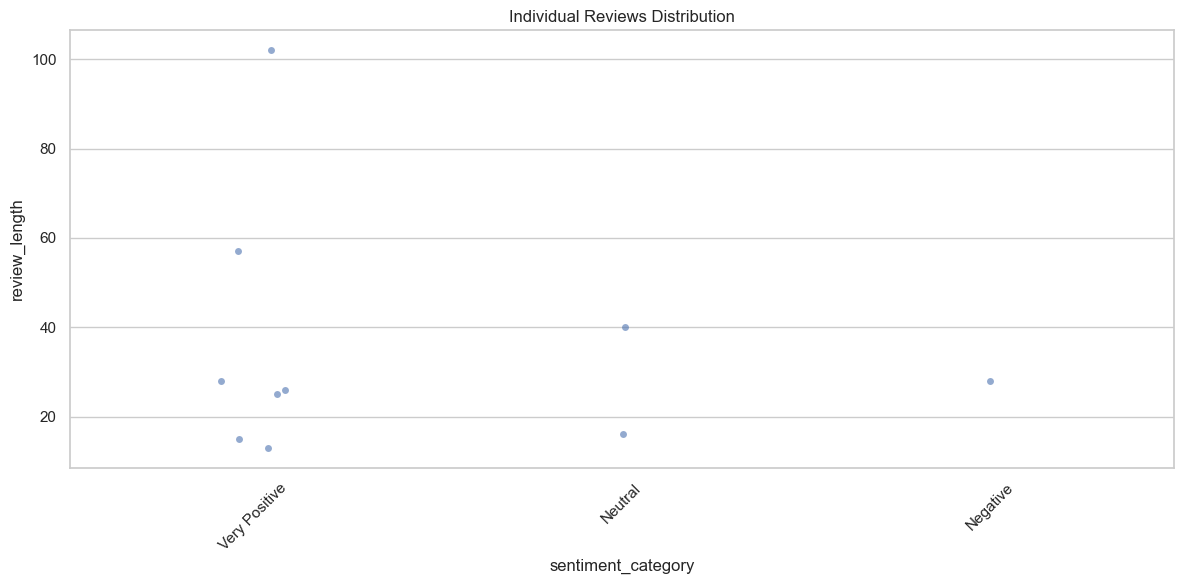

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Set basic seaborn style without using plt.style
sns.set_theme(style="whitegrid")

# Create sentiment categories
def get_sentiment_category(score):
    if score == 1:
        return 'Very Negative'
    elif score == 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    elif score == 4:
        return 'Positive'
    else:
        return 'Very Positive'

# Add sentiment categories and review length to dataframe
df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)
df['review_length'] = df['review'].str.len()

# 1. Sentiment Distribution Bar Plot
plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment'].value_counts().sort_index()
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')
plt.title('Distribution of Sentiment Scores', pad=15)
plt.xlabel('Sentiment Score (1-5)')
plt.ylabel('Number of Reviews')
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

# 2. Pie Chart of Sentiment Categories
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#ffdda1', '#c2f0c2', '#66b3ff', '#c2c2f0']
plt.pie(sentiment_counts, labels=[f'Score {i}' for i in sentiment_counts.index], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Different Sentiment Scores')
plt.axis('equal')
plt.show()

# 3. Horizontal Bar Chart with Categories
plt.figure(figsize=(12, 6))
category_counts = df['sentiment_category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values, palette='RdYlGn')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Number of Reviews')
for i, v in enumerate(category_counts):
    plt.text(v + 0.1, i, str(v))
plt.tight_layout()
plt.show()

# 4. Review Length vs Sentiment Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length Distribution by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Review Length (characters)')
plt.show()

# 5. Average Sentiment by Review Length Categories
df['length_bucket'] = pd.qcut(df['review_length'], q=4, 
                            labels=['Very Short', 'Short', 'Long', 'Very Long'])
avg_sentiment_by_length = df.groupby('length_bucket')['sentiment'].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_sentiment_by_length.index, y=avg_sentiment_by_length.values, color='lightgreen')
plt.title('Average Sentiment Score by Review Length')
plt.xlabel('Review Length Category')
plt.ylabel('Average Sentiment Score')
for i, v in enumerate(avg_sentiment_by_length):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# 6. Heatmap of Sentiment Categories and Length Buckets
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['length_bucket'], df['sentiment_category'])
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap: Review Length vs Sentiment Categories')
plt.tight_layout()
plt.show()

# 7. Sentiment Distribution (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='sentiment', fill=True)
plt.title('Density Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# 8. Strip Plot for Individual Reviews
plt.figure(figsize=(12, 6))
sns.stripplot(x='sentiment_category', y='review_length', data=df, jitter=True, alpha=0.6)
plt.title('Individual Reviews Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the enhanced dataframe
df.to_csv('sentiment_analysis_results.csv', index=False)